```
Google Calendar Toolkit
https://python.langchain.com/docs/integrations/tools/google_calendar/

In [ ]:
# %pip install -qU langchain-google-community[calendar]

In [1]:
from langchain_google_community import CalendarToolkit
from torch.backends.mkl import verbose

toolkit = CalendarToolkit()

In [2]:
from langchain_google_community import CalendarToolkit
from langchain_google_community.calendar.utils import (
    build_resource_service,
    get_google_credentials,
)

# Can review scopes here: https://developers.google.com/calendar/api/auth
# For instance, readonly scope is https://www.googleapis.com/auth/calendar.readonly
credentials = get_google_credentials(
    token_file="token.json",
    scopes=["https://www.googleapis.com/auth/calendar"],
    client_secrets_file="credentials.json",
)

api_resource = build_resource_service(credentials=credentials)
toolkit = CalendarToolkit(api_resource=api_resource)

In [3]:
tools = toolkit.get_tools()
tools

[CalendarCreateEvent(api_resource=<googleapiclient.discovery.Resource object at 0x000002589C177B90>),
 CalendarSearchEvents(api_resource=<googleapiclient.discovery.Resource object at 0x000002589C177B90>),
 CalendarUpdateEvent(api_resource=<googleapiclient.discovery.Resource object at 0x000002589C177B90>),
 GetCalendarsInfo(api_resource=<googleapiclient.discovery.Resource object at 0x000002589C177B90>),
 CalendarMoveEvent(api_resource=<googleapiclient.discovery.Resource object at 0x000002589C177B90>),
 CalendarDeleteEvent(api_resource=<googleapiclient.discovery.Resource object at 0x000002589C177B90>),
 GetCurrentDatetime(api_resource=<googleapiclient.discovery.Resource object at 0x000002589C177B90>)]

In [6]:
# Invoke directly with args
# You can invoke the tool directly by passing the required arguments in a dictionary format. Here is an example of creating a new event using the CalendarCreateEvent tool.
from langchain_google_community.calendar.create_event import CalendarCreateEvent

tool = CalendarCreateEvent()
tool.invoke(
    {
        "summary": "Calculus exam",
        "start_datetime": "2025-04-30 11:00:00",
        "end_datetime": "2025-04-30 13:00:00",
        "timezone": "Asia/Seoul",
        "location": "Seoul",
        "description": "Event created from the LangChain toolkit",
        "reminders": [{"method": "popup", "minutes": 60}],
        "conference_data": True,
        "color_id": "5",
    }
)

'Event created: https://www.google.com/calendar/event?eid=dXYxNjg3aXFiczE2cHJ1cG1hNHBhZzk4cmMgY2hhbmdvb2gua0Bt'

In [7]:
from dotenv import load_dotenv
load_dotenv()
import warnings
warnings.filterwarnings("ignore")

In [8]:
from langchain_openai import ChatOpenAI
# # 기본 LLM
# llm = ChatOpenAI(model="gpt-4o-mini", temperature=0, streaming=True)

import os

os.environ["OPENAI_API_VERSION"] = os.getenv('AZURE_OPENAI_VERSION')
os.environ["AZURE_OPENAI_ENDPOINT"] = os.getenv('AZURE_OPENAI_END_POINT')
os.environ["AZURE_OPENAI_API_KEY"] = os.getenv('AZURE_OPENAI_KEY')

from langchain_openai import AzureChatOpenAI

llm = AzureChatOpenAI(
    azure_deployment=os.getenv('DEPLOYMENT_NAME'),  # or your deployment
    api_version=os.getenv('AZURE_OPENAI_VERSION'),  # or your api version
    temperature=0,
    # stream=True,
    # max_tokens=40000,
    # timeout=None,
    # max_retries=2,
    # other params...
)

# from langchain_anthropic import ChatAnthropic
# 
# # claude 모델 로드 
# llm = ChatAnthropic(
#     # model="claude-3-5-sonnet-20241022",
#     model="claude-3-7-sonnet-20250219",
#     temperature=0,
#     # max_tokens=200, 
#     api_key=os.getenv('ANTHROPIC_API_KEY'),
#     streaming=True,
# )

In [9]:
from langgraph.prebuilt import create_react_agent

agent_executor = create_react_agent(llm, tools)

In [10]:
example_query = "Create a green event for every 22:00 until the end of this month to go for a 30-minute run."

events = agent_executor.stream(
    {"messages": [("user", example_query)]},
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Create a green event for every 22:00 until the end of this month to go for a 30-minute run.
================================== Ai Message ==================================
Tool Calls:
  get_current_datetime (call_SwHnP55pK95NTbKXBcSn0J78)
 Call ID: call_SwHnP55pK95NTbKXBcSn0J78
  Args:
    calendar_id: primary
================================= Tool Message =================================
Name: get_current_datetime

Time zone: Asia/Seoul, Date and time: 2025-06-30 14:58:32
================================== Ai Message ==================================
Tool Calls:
  create_calendar_event (call_Ua5WulOImzKY1GfqVaZFo1cJ)
 Call ID: call_Ua5WulOImzKY1GfqVaZFo1cJ
  Args:
    summary: 30-Minute Run
    start_datetime: 2025-06-30 22:00:00
    end_datetime: 2025-06-30 22:30:00
    timezone: Asia/Seoul
    recurrence: {'FREQ': 'DAILY', 'INTERVAL': 1, 'UNTIL': '20250630', 'COUNT': None, 'BYDAY': None}
    color_i

In [11]:
# example_query = " delete a 30-minute run created on this afternoon."
example_query = " delete a 30-minute run created on tomorrow."

events = agent_executor.stream(
    {"messages": [("user", example_query)]},
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

 delete a 30-minute run created on tomorrow.
================================== Ai Message ==================================
Tool Calls:
  get_current_datetime (call_dYZfFeBRonY1OqZfHfjpz39H)
 Call ID: call_dYZfFeBRonY1OqZfHfjpz39H
  Args:
    calendar_id: primary
================================= Tool Message =================================
Name: get_current_datetime

Time zone: Asia/Seoul, Date and time: 2025-06-30 14:58:37
================================== Ai Message ==================================
Tool Calls:
  get_calendars_info (call_udNZHnGQN581sBeXPbLIvUhY)
 Call ID: call_udNZHnGQN581sBeXPbLIvUhY
  Args:
================================= Tool Message =================================
Name: get_calendars_info

[{"id": "ko.south_korea#holiday@group.v.calendar.google.com", "summary": "\ub300\ud55c\ubbfc\uad6d\uc758 \ud734\uc77c", "timeZone": "Asia/Seoul"}, {"id": "family03736668094246964661@gr

In [23]:
example_query = """ show all the schedule for 30-minute run in April 2025. """

events = agent_executor.stream(
    {"messages": [("user", example_query)]},
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

 show all the schedule for 30-minute run in April 2025. 
================================== Ai Message ==================================

To find all the scheduled 30-minute runs in April 2025, I need to search the calendar for events that match this description. First, I'll retrieve the calendar information to ensure I search in the correct calendar. Then, I'll search for events in April 2025. Let's start by getting the calendar information.
Tool Calls:
  get_calendars_info (call_JvIMRXKBKD6b57JRsxErHzP1)
 Call ID: call_JvIMRXKBKD6b57JRsxErHzP1
  Args:
================================= Tool Message =================================
Name: get_calendars_info

[{"id": "changooh.k@gmail.com", "summary": "changooh.k@gmail.com", "timeZone": "Asia/Seoul"}, {"id": "ko.south_korea#holiday@group.v.calendar.google.com", "summary": "\ub300\ud55c\ubbfc\uad6d\uc758 \ud734\uc77c", "timeZone": "Asia/Seoul"}, {"id": "fa

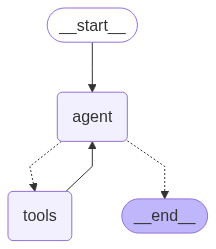

In [12]:
from langgraph.graph import MessagesState, StateGraph, START, END
from langgraph.prebuilt import create_react_agent
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display

# 메모리 초기화 
memory = MemorySaver()

# 그래프 생성 
graph = create_react_agent(
    llm, 
    tools=tools, 
    checkpointer=memory,
    )

# 그래프 출력
display(Image(graph.get_graph().draw_mermaid_png()))

In [13]:
import gradio as gr
from typing import List, Tuple
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.checkpoint.memory import MemorySaver
import uuid
# 메모리 사용 준비
memory = MemorySaver()
# graph_memory = graph.compile(checkpointer=memory)

# 예시 질문들
example_questions = [
    "create a green event for this evening to go for a 30-minute run.",
    "create a green event for every 22:00 until the end of this month to go for a 30-minute run.",
    "delete a 30-minute run created on tomorrow.",
    "show all the schedule for 30-minute run in April 2025."
]

# 답변 메시지 처리를 위한 함수
def process_message(message: str, history: List[Tuple[str, str]], thread_id: str) -> str:
    try:
        config = {"configurable": {"thread_id": thread_id}}
        inputs = {"messages": [HumanMessage(content=message)]}
        
        result = graph.invoke(inputs, config=config)
        
        if "messages" in result:
            # 메시지 로깅 (선택사항)
            print(f"스레드 ID: {thread_id}")
            for msg in result["messages"]:
                msg.pretty_print()

            last_message = result["messages"][-1]
            if isinstance(last_message, AIMessage):
                return last_message.content

        return "Sorry, couldn't generate a response. please try again."

    except Exception as e:
        print(f"Error occurred: {str(e)}")
        return "Sorry, an unexpected error was occurred. please try it all over again."


# 챗봇 클래스 생성
class ChatBot:
    def __init__(self):
        self.thread_id = str(uuid.uuid4())

    def chat(self, message: str, history: List[Tuple[str, str]]) -> str:
        print(f"Thread ID: {self.thread_id}")
        response = process_message(message, history, self.thread_id)
        return response

chatbot = ChatBot()


# ChatInterface 생성
demo = gr.ChatInterface(
    fn=chatbot.chat,
    title="Google Calendar AI Agent",
    description="I can help several crucial roles to enhance your productive and streamlined calendar management.",
    examples=example_questions,
    theme=gr.themes.Soft()
)


In [14]:
# Gradio 앱 실행
demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [15]:
demo.close()

Closing server running on port: 7860
